<a href="https://colab.research.google.com/github/galihpermana29/ML-Car-Insurance-Recomendation/blob/main/%F0%9F%94%8D%F0%9F%93%8A_Decoding_Insurance_Claims_Dynamics_wit_8bc3de.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
litvinenko630_insurance_claims_path = kagglehub.dataset_download('litvinenko630/insurance-claims')

print('Data source import complete.')


# Predictive Model for Insurance Claims

### Overview
In this project, our task is to develop and evaluate a predictive model that accurately identifies the likelihood of insurance claims, despite the inherent class imbalance in the dataset. The model should maintain high predictive accuracy across both classes, ensuring that insurers can effectively assess risk and allocate resources.

### Dataset
The dataset used for this project contains historical data on insurance claims, including information about the policyholders, their demographics, past claim history, and other relevant features. The dataset is sourced from [statso.io](#https://statso.io/training-models-on-imbalanced-data-case-study/).

### Objectives
1. Develop a predictive model that accurately predicts the likelihood of insurance claims.
2. Address the class imbalance issue in the dataset to ensure the model maintains high predictive accuracy across both classes (claims vs. non-claims).
3. Evaluate the performance of the model using appropriate metrics such as precision, recall, F1-score, and ROC-AUC.
4. Fine-tune the model parameters and explore different algorithms to improve its performance.
5. Provide insights and recommendations based on the model's predictions to help insurers better assess risk and allocate resources effectively.

### Methodology
We will employ a machine learning approach to develop the predictive model, utilizing techniques such as logistic regression, decision trees, random forests, or gradient boosting. To address the class imbalance issue, we will explore techniques such as oversampling, undersampling, or using class weights during model training. Model evaluation will be conducted using cross-validation and appropriate performance metrics.

### Libraries

In [ ]:
import pandas as pd  # Importing the pandas library and using the alias pd for convenient access to its functions
import seaborn as sns  # Importing the seaborn library and using the alias sns for data visualization
import matplotlib.pyplot as plt  # Importing the pyplot module from the matplotlib library and using the alias plt for plotting
import squarify  # Importing the squarify library for creating treemaps

from sklearn.utils import resample  # Importing the resample function from sklearn.utils for data resampling
from sklearn.metrics import (       # Importing various performance metrics from sklearn.metrics
    confusion_matrix,               # For computing confusion matrices
    classification_report,          # For generating classification reports
    accuracy_score,                 # For calculating accuracy scores
    roc_curve, auc                 # For generating ROC curves and calculating AUC
)
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier from sklearn.ensemble
from sklearn.preprocessing import LabelEncoder       # Importing LabelEncoder from sklearn.preprocessing
from sklearn.model_selection import train_test_split, cross_val_score  # Importing the train_test_split function from sklearn library for splitting data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # Importing the RandomForestClassifier class from sklearn library for building a random forest classifier



import warnings  # Importing the warnings module for managing warning outputs
warnings.filterwarnings('ignore')  # Disabling warning outputs

%config InlineBackend.figure_format = 'svg'
sns.set(style='whitegrid')  # Setting the style for seaborn plots

### Project Structure

1. [**Loading Data**](#first): Load the dataset from a file or source into a DataFrame for analysis.
2. [**Data Preprocessing**](#second): Handle any missing or erroneous data, perform data type conversions, and clean the dataset for further analysis.
3. [**Exploratory Data Analysis (EDA)**](#third): Explore the dataset to gain insights into its distribution, relationships, and patterns. Visualize key features and relationships between variables.
4. [**Oversampling the Minority Class**](#fourth): Implement oversampling techniques to address class imbalance in the dataset.
5. [**Feature Engineering**](#fifth): Create new features or transform existing ones to improve the predictive power of the model.
6. [**Data Splitting**](#sixth): Split the training dataset into features (x) and the target variable (y) to prepare for model training.
7. [**Model Training**](#seventh): Utilize machine learning algorithms to train a predictive model on the training data.
8. [**Model Evaluation**](#eighth): Evaluate the trained model's performance using appropriate metrics and techniques.


# <a id='first'></a> Loading Data

In [ ]:
# Path to the CSV data file
DATAPATH = '/kaggle/input/insurance-claims/Insurance claims data.csv'

# Reading data from the CSV file into a DataFrame using the first column as the index
df = pd.read_csv(DATAPATH)

# Displaying the first few rows of the DataFrame
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [ ]:
# Retrieve the column names of the DataFrame 'df'
column_names = df.columns
# Print the column names
print(column_names)


Index(['policy_id', 'subscription_length', 'vehicle_age', 'customer_age',
       'region_code', 'region_density', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'steering_type', 'turning_radius', 'length',
       'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status'],
      dtype='object')


### Description of Columns

- **policy_id**: Unique identifier for the insurance policy.
- **subscription_length**: The duration for which the insurance policy is active.
- **vehicle_age**: Age of the vehicle insured.
- **customer_age**: Age of the insurance policyholder.
- **region_code**: The code representing the geographical region of the policyholder.
- **region_density**: Population density of the policyholder’s region.
- **segment**: Segment of the vehicle.
- **model**: The model of the vehicle.
- **fuel_type**: Type of fuel the vehicle uses (e.g., Petrol, Diesel, CNG).
- **max_torque**, **max_power**: Engine performance characteristics.
- **engine_type**: The type of engine.
- **airbags**: The number of airbags in the vehicle.
- **is_esc** (Electronic Stability Control), **is_adjustable_steering**, **is_tpms** (Tire Pressure Monitoring System): Features that enhance vehicle safety.
- **is_parking_sensors**, **is_parking_camera**: Parking aids.
- **rear_brakes_type**: Type of rear brakes.
- **displacement**, **cylinder**: Specifications related to the engine size and construction.
- **transmission_type**: Type of transmission.
- **steering_type**: Type of steering mechanism.
- **turning_radius**: Turning radius of the vehicle.
- **length**, **width**, **gross_weight**: Dimensions and weight of the vehicle.
- **is_front_fog_lights**, **is_rear_window_wiper**, **is_rear_window_washer**, **is_rear_window_defogger**, **is_brake_assist**, **is_power_door_locks**, **is_central_locking**, **is_power_steering**, **is_driver_seat_height_adjustable**, **is_day_night_rear_view_mirror**, **is_ecw**, **is_speed_alert**: Various binary indicators for specific vehicle amenities and safety features.
- **ncap_rating**: NCAP safety rating of the vehicle.
- **claim_status**: Indicates whether a claim was made (1) or not (0).


In [ ]:
# This line of code retrieves the shape of the DataFrame 'df'
shape = df.shape
print(shape)

(58592, 41)


# <a id='second'></a> Data Preprocessing

In [ ]:
# Displaying concise summary information about the DataFrame, including
# data types, non-null values, and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [ ]:
# Displaying the data types of each column in the DataFrame
df.dtypes

policy_id                            object
subscription_length                 float64
vehicle_age                         float64
customer_age                          int64
region_code                          object
region_density                        int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
steering_type                   

In [ ]:
# Counting the number of missing values in each column and then counting
# the frequency of those counts to summarize the distribution of missing values
df.isna().sum().value_counts()


0    41
Name: count, dtype: int64

In [ ]:
# Counting the number of duplicated rows in the DataFrame and then counting
# the frequency of those counts to summarize the distribution of duplicated rows
df.duplicated().value_counts()


False    58592
Name: count, dtype: int64

Hense `policy_id` is a unique identifier for the insurance policy, this column should be dropped to ensure the uniqueness of each policy doesn't influence the predictive power of the model. Dropping it will help avoid any biases or confusion that might arise from the model mistakenly learning patterns related to these identifiers.

In [ ]:
# Dropping the 'policy_id' column from the DataFrame along the columns axis
df.drop(columns='policy_id', axis=1, inplace=True)


# <a id='third'></a> Exploratory Data Analysis

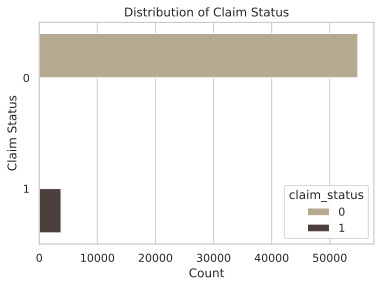

In [ ]:
# Creating a count plot to visualize the distribution of claim status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y='claim_status', hue='claim_status', palette=['#BBAB8C', '#503C3C'])
plt.xlabel('Count')
plt.ylabel('Claim Status')
plt.title('Distribution of Claim Status')
plt.show()


In this dataset, there is a significant class imbalance, which may affect the model's ability to learn properly and accurately classify instances.

To address the class imbalance issue, we will explore resampling techniques during model training. Resampling involves modifying the distribution of the training data to balance the classes.

Two common resampling techniques are:

1. **Oversampling**: This involves increasing the number of instances in the minority class by duplicating or creating synthetic samples. Popular oversampling methods include Random Oversampling and Synthetic Minority Over-sampling Technique (SMOTE).

2. **Undersampling**: This involves reducing the number of instances in the majority class by randomly removing samples. Common undersampling methods include Random Undersampling and Tomek Links.



In [ ]:
# Selecting the numerical columns from the DataFrame and storing their column names in a variable
numerical_columns = df[['subscription_length', 'vehicle_age', 'customer_age']].columns

# Displaying the column names of the selected numerical columns
numerical_columns


Index(['subscription_length', 'vehicle_age', 'customer_age'], dtype='object')

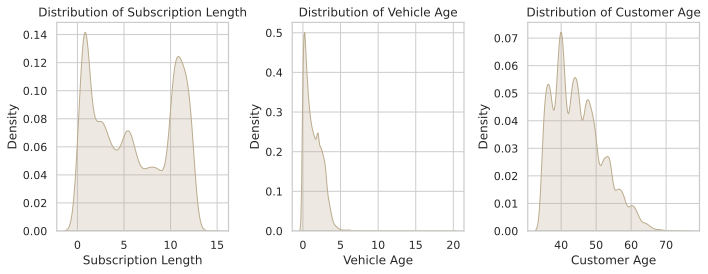

In [ ]:
# plotting distributions of numerical features
plt.figure(figsize=(10, 4))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3, 3, i)
    sns.kdeplot(df[col], fill = True, color = '#BBAB8C')
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
    plt.xlabel(f'{" ".join([el.title() for el in col.split("_")])}')

plt.tight_layout()
plt.show()


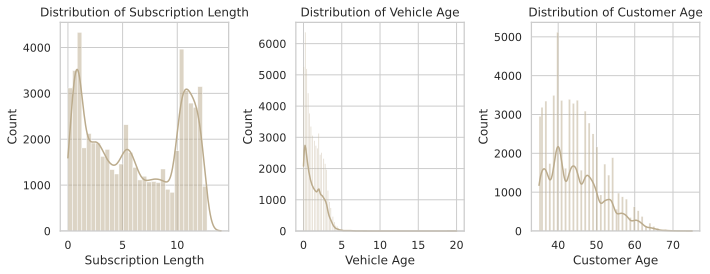

In [ ]:
# Creating subplots to visualize the distribution of numerical columns
plt.figure(figsize=(10, 4))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=col, color='#BBAB8C', kde=True)
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
    plt.xlabel(f'{" ".join([el.title() for el in col.split("_")])}')
plt.tight_layout()
plt.show()


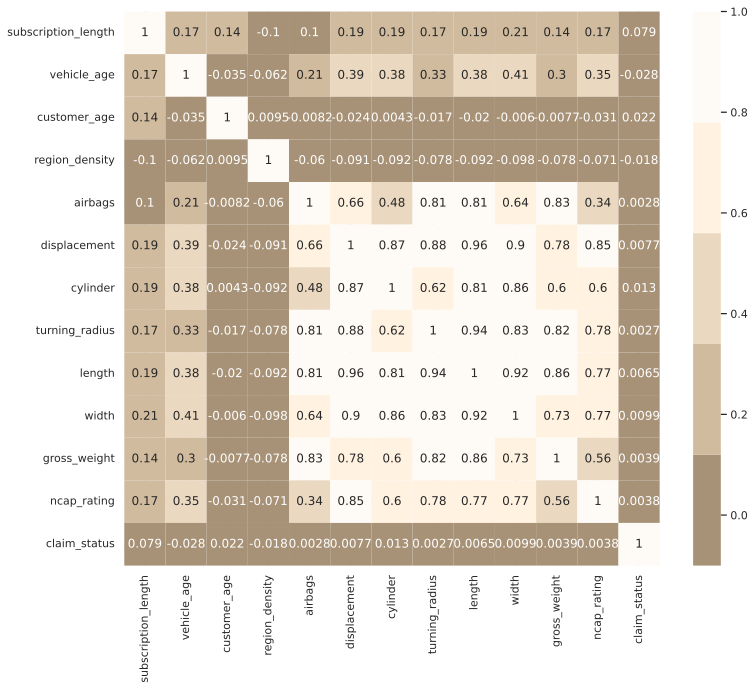

In [ ]:
# Creating a heatmap to visualize the correlation matrix of numerical columns
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap=['#A79277', '#D1BB9E', '#EAD8C0', '#FFF2E1', '#FEFAF6'])
plt.show()


In [ ]:
# Specifying a list of categorical columns
categorical_columns = ['region_code', 'segment', 'fuel_type']


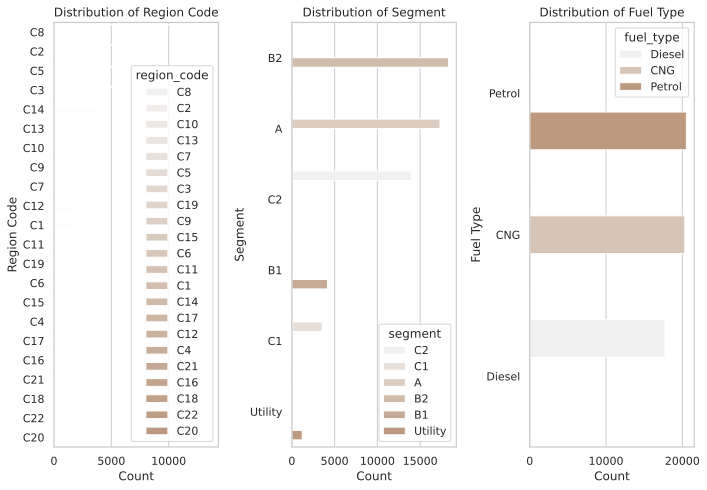

In [ ]:
# Creating subplots to visualize the distribution of categorical columns
plt.figure(figsize=(10, 7))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, hue=col, color='#C69774')
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
    plt.xlabel('Count')
    plt.ylabel(f'{" ".join([el.title() for el in col.split("_")])}')
plt.tight_layout()
plt.show()


# <a id='fourth'></a> Oversampling the Minority Class

In [ ]:
# Creating subsets of the DataFrame based on the 'claim_status' column:
# - 'minority' contains rows where 'claim_status' is equal to 1
# - 'majority' contains rows where 'claim_status' is equal to 0
minority = df[df['claim_status'] == 1]
majority = df[df['claim_status'] == 0]


In [ ]:
majority.head()

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [ ]:
# Oversampling the minority class to balance the dataset
minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)


In [ ]:
# Concatenating the majority class with the oversampled minority class to create a balanced dataset
oversampled_data = pd.concat([majority, minority_oversampled])
oversampled_data.head()


,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [ ]:
# Counting the number of occurrences of each class in the 'claim_status' column
oversampled_data['claim_status'].value_counts()


claim_status
0    54844
1    54844
Name: count, dtype: int64

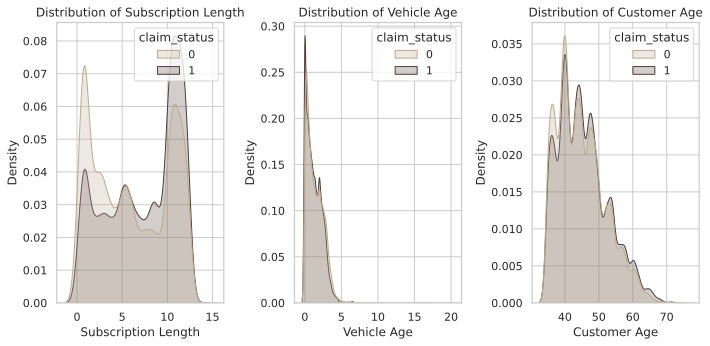

In [ ]:
# Creating subplots to visualize the distribution of numerical columns with KDE plots
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(data=oversampled_data, x=col, hue='claim_status', fill=True, palette=['#BBAB8C', '#503C3C'])
    plt.xlabel(f'{" ".join([el.title() for el in col.split("_")])}')
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
plt.tight_layout()
plt.show()


### Conclusion

The distribution of the `claim_status` target variable after oversampling is as follows:

- Class 0: 54844 instances
- Class 1: 54844 instances

This balanced distribution indicates that the oversampling technique has effectively addressed the class imbalance issue in the dataset. With an equal number of instances for both classes, we can now proceed to train our predictive model on the balanced dataset, ensuring that both classes are adequately represented and the model can learn from both types of instances effectively.


# <a id='fifth'></a> Feature Engineering


In this section, we'll address the need to preprocess categorical variables in our dataset before training machine learning models. Many machine learning algorithms require numerical input, which means we need to convert categorical variables into a numerical format. One common technique for achieving this is using the LabelEncoder from the scikit-learn library. The LabelEncoder converts categorical labels into numerical labels, allowing us to represent categorical data numerically. We'll initialize a LabelEncoder object and apply it to each column in our dataset where the data type is 'object', effectively transforming categorical variables into a format suitable for model training. Let's dive into the code and preprocess our data using LabelEncoder!


In [ ]:
# Initialize a LabelEncoder

labenc = LabelEncoder()

# Apply LabelEncoder to each column if the column dtype is 'object', else keep the column as is
encoded_data = df.apply(lambda col: labenc.fit_transform(col) if col.dtype == 'object' else col)

In [ ]:
encoded_data.head()

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,9.3,1.2,41,20,8794,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
1,8.2,1.8,35,11,27003,3,10,1,2,8,...,0,1,1,1,1,1,1,1,4,0
2,9.5,0.2,44,20,8794,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
3,5.2,0.4,44,1,73430,0,0,0,5,2,...,0,0,0,1,0,0,0,1,0,0
4,10.1,1.0,56,4,5410,2,6,1,3,7,...,0,1,1,1,0,0,1,1,5,0


In [ ]:
# Separating features (X) and target variable (y)
X = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']

In [ ]:
# Instantiate the Random Forest classifier with a random state of 42
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X, y)


RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importances from the trained Random Forest model
feature_importance = rf_model.feature_importances_


In [ ]:
# Create a DataFrame to store feature names and their corresponding importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by feature importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
features_df.head(10)

,Feature,Importance
0,subscription_length,0.417150
2,customer_age,0.263397
1,vehicle_age,0.193724
4,region_density,0.059310
3,region_code,0.058201
6,model,0.000672
23,length,0.000639
24,width,0.000591
22,turning_radius,0.000504
25,gross_weight,0.000491


### Conclusion

Based on the feature importance analysis, it is evident that:

- `subscription_length`: 0.417150
- `customer_age`: 0.263397
- `vehicle_age`: 0.193724
- `region_density`: 0.059310
- `region_code`: 0.058201

These results indicate that subscription length, customer age, and vehicle age are the most influential features in predicting insurance claims likelihood. Factors such as region density and region code also contribute to the predictive power, albeit to a lesser extent. Understanding and considering these key features can aid insurers in accurately assessing risk and allocating resources effectively.


In [ ]:
# Separating features (X) and target variable (y) from the oversampled dataset
X_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']


In [ ]:
# Apply LabelEncoder to each column if the column dtype is 'object', else keep the column as is
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)


# <a id='sixth'></a> Data Splitting

In [ ]:
# Splitting the oversampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled_encoded, y_oversampled, test_size=0.4, random_state=42)

# <a id='seventh'></a> Model Training

In [ ]:
# Instantiate the Random Forest classifier with a random state of 42
rf_model_oversampled = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model_oversampled.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predicting the target variable for the test set using the trained model
print(X_test)
y_pred = rf_model_oversampled.predict(X_test)


       subscription_length  vehicle_age  customer_age  region_code  \
47907                  2.6          0.2            55           11   
16074                  8.8          0.8            47           11   
10035                  1.8          0.2            40           11   
524                    8.1          3.8            47           10   
24153                  3.8          1.2            45           20   
...                    ...          ...           ...          ...   
29203                 10.5          0.4            54           20   
44588                  7.9          2.4            45           11   
8019                  11.2          0.4            49            5   
38386                  5.9          4.2            71           11   
28704                  1.4          0.4            43           15   

       region_density  segment  model  fuel_type  max_torque  max_power  ...  \
47907           27003        1      9          0           6          3  ...   

In [ ]:
import numpy as np
# Access a single row (e.g., at index 1) from X_test
single_data = X_test.iloc[4]  # Extract row as a pandas Series
apps_data = {
    "subscription_length": 3.8,
    "vehicle_age": 1.2,
    "customer_age": 45.0,
    "region_code": 20.0,
    "region_density": 8794.0,
    "segment": 2.0,
    "model": 7.0,
    "fuel_type": 2.0,
    "max_torque": 0.0,
    "max_power": 6.0,
    "engine_type": 8.0,
    "airbags": 2.0,
    "is_esc": 0.0,
    "is_adjustable_steering": 1.0,
    "is_tpms": 0.0,
    "is_parking_sensors": 1.0,
    "is_parking_camera": 0.0,
    "rear_brakes_type": 1.0,
    "displacement": 1197.0,
    "cylinder": 4.0,
    "transmission_type": 1.0,
    "steering_type": 0.0,
    "turning_radius": 4.8,
    "length": 3845.0,
    "width": 1735.0,
    "gross_weight": 1335.0,
    "is_front_fog_lights": 1.0,
    "is_rear_window_wiper": 0.0,
    "is_rear_window_washer": 0.0,
    "is_rear_window_defogger": 0.0,
    "is_brake_assist": 1.0,
    "is_power_door_locks": 1.0,
    "is_central_locking": 1.0,
    "is_power_steering": 1.0,
    "is_driver_seat_height_adjustable": 1.0,
    "is_day_night_rear_view_mirror": 1.0,
    "is_ecw": 1.0,
    "is_speed_alert": 1.0,
    "ncap_rating": 2.0
}

# Convert the object to a DataFrame (single row)
import pandas as pd
data_df = pd.DataFrame([apps_data])

# Encode each categorical column using the saved encoders
for column, encoder in label_encoders.items():
    if column in data_df.columns:
        data_df[column] = encoder.transform(data_df[column])

# The encoded data is now ready for prediction
print("Encoded Data:")
print(data_df)

# Convert data_object into a 2D array
single_data_reshaped = np.array(list(apps_data.values())).reshape(1, -1)

# Make a prediction
single_prediction = rf_model_oversampled.predict(single_data_reshaped)
print("Prediction for index 1:", single_prediction)

# Print the classification report
print(classification_report(y_test, y_pred))

Encoded Data:
   subscription_length  vehicle_age  customer_age  region_code  \
0                  3.8          1.2          45.0         20.0   

   region_density  segment  model  fuel_type  max_torque  max_power  ...  \
0          8794.0      2.0    7.0        2.0         0.0        6.0  ...   

   is_rear_window_defogger  is_brake_assist  is_power_door_locks  \
0                      0.0              1.0                  1.0   

   is_central_locking  is_power_steering  is_driver_seat_height_adjustable  \
0                 1.0                1.0                               1.0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  
0                            1.0     1.0             1.0          2.0  

[1 rows x 39 columns]
Prediction for index 1: [1]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     21994
           1       0.95      1.00      0.97     21882

    accuracy                           0.97    

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle

# Load your DataFrame (replace with your real data)
# df = ...
df = pd.read_csv(DATAPATH)

# Displaying the first few rows of the DataFrame
df.head()
# Dictionary to store LabelEncoders for each column
label_encoders = {}
# print(df.columns)
# Apply LabelEncoder to each object column and store the encoder
for column in df.columns:
    # print(df[column].dtype, df[column])
    if df[column].dtype == 'object':  # Check if the column is categorical (dtype='object')
        # print(df[column])
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])  # Encode the categorical column
        label_encoders[column] = le  # Save the encoder for this column

# Save the LabelEncoders for later use
with open('label_encoders-3.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Encoded data is stored in 'df', and encoders are saved in 'label_encoders.pkl'
print("Encoders saved successfully!")
print(label_encoders.keys())

Encoders saved successfully!
dict_keys(['policy_id', 'region_code', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert'])


In [ ]:
# Your new data (to predict)
data_object = {
    "subscription_length": 10.1,
    "vehicle_age": 1.0,
    "customer_age": 56,
    "region_code": "C13",
    "region_density": 5410,
    "segment": "B2",
    "model": "M5",
    "fuel_type": "Diesel",
    "max_torque": "200Nm@3000rpm",
    "max_power": "88.77bhp@4000rpm",
    "engine_type": "1.5 Turbocharged Revotorq",
    "airbags": 2,
    "is_esc": "No",
    "is_adjustable_steering": "Yes",
    "is_tpms": "No",
    "is_parking_sensors": "Yes",
    "is_parking_camera": "No",
    "rear_brakes_type": "Drum",
    "displacement": 1497,
    "cylinder": 4,
    "transmission_type": "Manual",
    "steering_type": "Electric",
    "turning_radius": 5.0,
    "length": 3990,
    "width": 1755,
    "gross_weight": 1490,
    "is_front_fog_lights": "No",
    "is_rear_window_wiper": "No",
    "is_rear_window_washer": "No",
    "is_rear_window_defogger": "No",
    "is_brake_assist": "No",
    "is_power_door_locks": "Yes",
    "is_central_locking": "Yes",
    "is_power_steering": "Yes",
    "is_driver_seat_height_adjustable": "No",
    "is_day_night_rear_view_mirror": "No",
    "is_ecw": "Yes",
    "is_speed_alert": "Yes",
    "ncap_rating": 5,
    "claim_status": 0 # Assuming this is the target (and should not be part of feature input during prediction)
}

# Load the saved encoders
label_encoders = {}
with open('label_encoders-3.pkl', 'rb') as f:
    label_encoders = pickle.load(f)

# Confirm loaded encoders
print("Encoders loaded:", label_encoders.keys())


# Convert incoming data to DataFrame
single_data = pd.DataFrame([data_object])

# Encode categorical columns using saved encoders
for column in single_data.columns:
    if column in label_encoders:  # Check if LabelEncoder was saved for this column
        le = label_encoders[column]
        try:
            single_data[column] = le.transform(single_data[column])  # Transform using saved encoder
        except ValueError:
            # Handle unseen categories (new categories not present during training)
            single_data[column] = single_data[column].apply(
                lambda x: le.transform([x])[0] if x in le.classes_ else -1  # Assign -1 for unseen categories
            )

# Drop target variable if it exists (won't be part of the model input)
if 'claim_status' in single_data.columns:
    single_data = single_data.drop(columns=['claim_status'])

# Convert to numpy array for model prediction
single_data_array = single_data.to_numpy().reshape(1, -1)

print("Encoded data ready for prediction:", single_data)


# Assuming your trained model is `rf_model_oversampled`
single_prediction = rf_model_oversampled.predict(single_data_array)

# Output the prediction
print("Prediction:", single_prediction)

Encoders loaded: dict_keys(['policy_id', 'region_code', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert'])
Encoded data ready for prediction:    subscription_length  vehicle_age  customer_age  region_code  \
0                 10.1          1.0            56            4   

   region_density  segment  model  fuel_type  max_torque  max_power  ...  \
0            5410        2      6          1           3          7  ...   

   is_rear_window_defogger  is_brake_assist  is_power_door_locks  \
0                        0                0       

ValueError: could not convert string to float: 'C13'

In [ ]:
# Save model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model_oversampled, f)

### Conclusion

Based on the classification report, our predictive model for insurance claims likelihood assessment demonstrates excellent performance across various evaluation metrics. With a precision of 1.00 for class 0 and 0.95 for class 1, the model achieves high accuracy in predicting both positive and negative instances. Moreover, the recall score of 0.95 for class 0 and 1.00 for class 1 indicates the model's ability to effectively capture true positive instances while minimizing false negatives. The balanced f1-score of 0.97 for both classes further validates the model's robustness in terms of precision and recall. Overall, with an accuracy of 0.97, the model showcases strong predictive capabilities, making it a reliable tool for insurers to assess insurance claims likelihood accurately. This performance underscores the effectiveness of our predictive modeling approach and its potential to contribute to more informed decision-making in the insurance industry.


# <a id='eighth'></a> Model Evaluation

In this section, we'll thoroughly evaluate the performance of our predictive model for insurance claims likelihood assessment. Evaluating the model is essential to understand its effectiveness, generalization ability, and potential limitations. We'll use a variety of evaluation metrics to assess different aspects of the model's performance, including accuracy, precision, recall, F1-score, and ROC-AUC. These metrics provide insights into how well the model predicts both positive and negative instances, its ability to minimize false positives and false negatives, and its overall discriminative power. By comprehensively evaluating the model, we aim to gain a deeper understanding of its strengths and weaknesses, identify areas for improvement, and ultimately make informed decisions about its deployment in real-world applications. Let's delve into the model evaluation process and analyze the performance of our predictive model!



In [ ]:
# Create a DataFrame to store the top 5 most important features and their importances
importance_df = pd.DataFrame({
    'Column': list(map(lambda col: ' '.join(map(str.title, col.split('_'))), X_oversampled_encoded.columns)),
    'Importance': rf_model_oversampled.feature_importances_
}).sort_values(by='Importance', ascending=False).head(5)


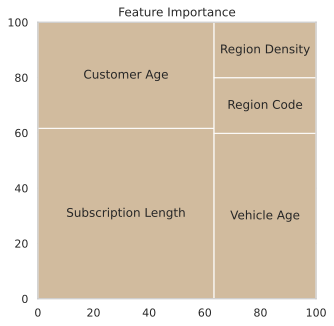

In [ ]:
# Set up the figure and plot the treemap
plt.figure(figsize=(5, 5))
squarify.plot(sizes=importance_df['Importance'], label=importance_df['Column'], color='#D1BB9E', edgecolor='white')

# Add title
plt.title('Feature Importance')

# Show the plot
plt.show()


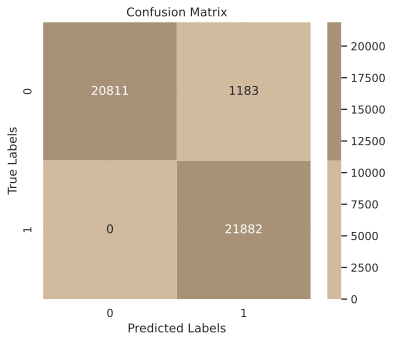

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=['#D1BB9E', '#A79277'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9730376515634971


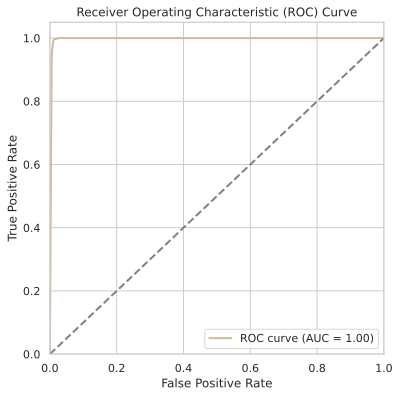

In [ ]:
y_probs = rf_model_oversampled.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='#D1BB9E', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Perform k-fold cross-validation
scores = cross_val_score(rf_model_oversampled, X_train, y_train, cv=5, scoring='accuracy')

# Print the mean accuracy and standard deviation of the cross-validation scores
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())


Mean Accuracy: 0.9660092490100773
Standard Deviation of Accuracy: 0.0010790552679904987


### Applying Pretrained Model for Prediction

In this section, we'll apply the pretrained model to the original test data to generate predictions for insurance claims likelihood. After training and fine-tuning our model on the training data, it's crucial to evaluate its performance on unseen data to assess its generalization ability. We'll use the imbalanced test data, which contains instances that the model has not seen during training, to make predictions. Subsequently, we'll compare the predicted labels with the actual labels to evaluate the model's accuracy. This analysis will provide insights into how well our model performs in real-world scenarios and its effectiveness in accurately identifying insurance claims likelihood. Let's proceed with applying the pretrained model and evaluating its performance!


In [ ]:
# Create a copy of the original DataFrame
original_encoded = df.copy()

print(type(original_encoded))
# Initialize a dictionary to store the encoders
encoders = {}

# Iterate over categorical columns and create LabelEncoders
for col in X_oversampled.select_dtypes(include=['object']).columns:
    encoders[col] = LabelEncoder().fit(X_oversampled[col])


<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Printing the dictionary containing fitted LabelEncoders for each categorical column
encoders


{'region_code': LabelEncoder(),
 'segment': LabelEncoder(),
 'model': LabelEncoder(),
 'fuel_type': LabelEncoder(),
 'max_torque': LabelEncoder(),
 'max_power': LabelEncoder(),
 'engine_type': LabelEncoder(),
 'is_esc': LabelEncoder(),
 'is_adjustable_steering': LabelEncoder(),
 'is_tpms': LabelEncoder(),
 'is_parking_sensors': LabelEncoder(),
 'is_parking_camera': LabelEncoder(),
 'rear_brakes_type': LabelEncoder(),
 'transmission_type': LabelEncoder(),
 'steering_type': LabelEncoder(),
 'is_front_fog_lights': LabelEncoder(),
 'is_rear_window_wiper': LabelEncoder(),
 'is_rear_window_washer': LabelEncoder(),
 'is_rear_window_defogger': LabelEncoder(),
 'is_brake_assist': LabelEncoder(),
 'is_power_door_locks': LabelEncoder(),
 'is_central_locking': LabelEncoder(),
 'is_power_steering': LabelEncoder(),
 'is_driver_seat_height_adjustable': LabelEncoder(),
 'is_day_night_rear_view_mirror': LabelEncoder(),
 'is_ecw': LabelEncoder(),
 'is_speed_alert': LabelEncoder()}

In [ ]:
# Transforming categorical columns in the original encoded dataset using fitted LabelEncoders
for col in original_encoded.select_dtypes(include='object').columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

# Making predictions on the transformed dataset using the trained model
original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop('claim_status', axis=1))


In [ ]:
# Create a DataFrame to compare actual and predicted values of the 'claim_status' column
comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})

# Display the DataFrame
comparison_df


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
58587,0,0
58588,0,0
58589,0,0
58590,0,0


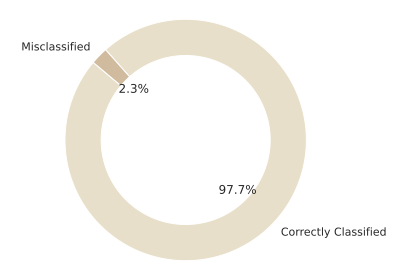

In [ ]:
# Calculate the counts of correctly and incorrectly classified samples
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

# Store the counts in a list
classification_counts = [correctly_classified, incorrectly_classified]

# Define labels for the counts
labels = ['Correctly Classified', 'Misclassified']

# Create a pie chart
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#E8DFCA', '#D1BB9E'])

# Draw a circle in the center to create a ring
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.show()

In [ ]:
!pip freeze > requirements.txt

In [ ]:
!python3 --version

Python 3.10.13


In [ ]:
!which python3

/opt/conda/bin/python3
